In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#sample_sub = pd.read_csv('sample_submission.csv')

## Data exploration

In [15]:
df_train

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.6,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.5,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.2,44.0,7.70,8.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,830,NaN,NaN,0.36,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,1.0,2.0,1.0,1.0,7.60,7.70,0,0,1
436,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.00,7.50,0,0,0
437,1081,NaN,5.0,NaN,0.27,NaN,0.274,NaN,14.0,0.0,...,NaN,4.0,NaN,11.0,11.0,7.60,7.60,1,1,1
438,458,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.8,0.3,8.20,8.00,1,0,0


In [16]:
df_train.describe()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
count,440.000000,103.000000,94.000000,307.000000,290.000000,116.000000,108.000000,111.000000,114.000000,125.000000,...,103.000000,305.000000,306.000000,419.000000,426.000000,432.000000,438.000000,440.000000,440.000000,440.000000
mean,847.884091,16.932117,10.102528,0.139752,0.132352,0.321819,0.497083,68.046847,66.514912,20.708800,...,0.524272,1.596721,1.650327,1.404081,1.395329,7.586852,7.652922,0.197727,0.200000,0.150000
std,482.227347,73.882649,12.298492,0.294113,0.236251,0.423732,0.939406,95.549023,84.631374,216.467309,...,0.639311,1.540460,1.429874,3.183978,2.982040,0.303888,0.315106,0.398739,0.400455,0.357478
min,165.000000,0.002000,0.002000,0.027000,0.020000,0.002000,0.009000,1.000000,0.700000,0.000000,...,0.000000,1.000000,1.000000,0.180000,0.140000,6.500000,6.600000,0.000000,0.000000,0.000000
25%,460.500000,5.000000,5.000000,0.050000,0.050000,0.100000,0.100000,4.900000,10.125000,0.000000,...,0.000000,1.000000,1.000000,0.960000,0.850000,7.400000,7.400000,0.000000,0.000000,0.000000
50%,741.000000,10.000000,5.000000,0.050000,0.050000,0.178500,0.252500,21.500000,31.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,7.600000,7.600000,0.000000,0.000000,0.000000
75%,1174.000000,10.000000,10.000000,0.140000,0.140000,0.403500,0.598500,99.500000,98.475000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,7.800000,7.900000,0.000000,0.000000,0.000000
max,2311.000000,754.000000,76.900000,3.500000,3.300000,3.700000,7.700000,461.000000,468.000000,2419.600000,...,3.000000,16.000000,16.000000,50.000000,44.000000,8.640000,8.470000,1.000000,1.000000,1.000000


In [17]:
df_train.isna().sum()

station_id                            0
Aluminium_2019                      337
Aluminium_2020                      346
Ammonium_2019                       133
Ammonium_2020                       150
Boron_2019                          324
Boron_2020                          332
Chloride_2019                       329
Chloride_2020                       326
Coli-like-bacteria-Colilert_2019    315
Coli-like-bacteria-Colilert_2020    315
Coli-like-bacteria_2019             118
Coli-like-bacteria_2020             120
Colony-count-at-22-C_2019            70
Colony-count-at-22-C_2020            53
Color-Pt-Co-unit_2019               381
Color-Pt-Co-unit_2020               377
Color-Pt/Co-scale_2019               68
Color-Pt/Co-scale_2020               61
Electrical-conductivity_2019         10
Electrical-conductivity_2020          4
Enterococci_2019                    256
Enterococci_2020                    267
Escherichia-coli-Colilert_2019      316
Escherichia-coli-Colilert_2020      316


In [18]:
df_train[['compliance_2019','compliance_2020','compliance_2021']]

,compliance_2019,compliance_2020,compliance_2021
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
435,0,0,1
436,0,0,0
437,1,1,1
438,1,0,0


In [19]:
print(df_train[['compliance_2019','compliance_2020','compliance_2021']].value_counts())

compliance_2019  compliance_2020  compliance_2021
0                0                0                  273
1                0                0                   41
0                1                0                   39
                 0                1                   23
1                1                0                   21
0                1                1                   18
1                0                1                   15
                 1                1                   10
dtype: int64


In [20]:
print(df_train['compliance_2021'].value_counts())

0    374
1     66
Name: compliance_2021, dtype: int64


## Data preprocessing

In [21]:
df_train

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.6,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.5,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.2,44.0,7.70,8.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,830,NaN,NaN,0.36,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,1.0,2.0,1.0,1.0,7.60,7.70,0,0,1
436,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.00,7.50,0,0,0
437,1081,NaN,5.0,NaN,0.27,NaN,0.274,NaN,14.0,0.0,...,NaN,4.0,NaN,11.0,11.0,7.60,7.60,1,1,1
438,458,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.8,0.3,8.20,8.00,1,0,0


## Feature Engineering

In [52]:
cols = list(df_test.columns)
#print(df_train[["Aluminium_2019", "Aluminium_2020"]])
cols.remove('station_id')
while cols:
    pair = [cols.pop(0), cols.pop(0)]
    new_column = []
    col_name = pair[0][:pair[0].index("_")]+"_change"
    for index, row in df_train.iterrows():
        if np.isnan(row[pair[0]]) or np.isnan(row[pair[1]]):
            new_column.append(-1)
        elif row[pair[0]] < row[pair[1]]:
            new_column.append(1)
        else:
            new_column.append(0)
    df_train[col_name] = new_column
    new_column = []
    col_name = pair[0][:pair[0].index("_")]+"_change"
    for index, row in df_test.iterrows():
        if np.isnan(row[pair[0]]) or np.isnan(row[pair[1]]):
            new_column.append(-1)
        elif row[pair[0]] < row[pair[1]]:
            new_column.append(1)
        else:
            new_column.append(0)
    df_test[col_name] = new_column



In [ ]:
df_train.to_csv('train_enhanced.csv',index=False)
df_test.to_csv('test_enhanced.csv',index=False)

In [53]:
df_test

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Odour-dilution-level_change,Oxidability_change,Smell-ball-units_change,Sodium_change,Sulphate_change,Taste-ball-units_change,Taste-dilution-degree_change,Turbidity-NTU_change,pH _change,compliance_change
0,163,5.0,5.0,0.08,0.08,0.071,0.062,130.0,102.0,NaN,...,0,1,-1,0,1,-1,0,1,0,0
1,167,NaN,NaN,0.08,0.08,NaN,NaN,NaN,NaN,NaN,...,1,-1,-1,-1,-1,-1,1,0,0,0
2,171,NaN,NaN,NaN,NaN,NaN,NaN,112.0,90.0,NaN,...,0,-1,-1,-1,-1,-1,0,1,1,1
3,174,5.0,5.0,0.05,0.09,0.072,0.075,248.0,243.0,0.0,...,1,1,-1,0,1,-1,1,0,1,0
4,178,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-1,-1,-1,-1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1941,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0,-1,-1,-1,-1,-1,-1,0,0,0
185,2087,5.0,NaN,NaN,NaN,0.855,NaN,417.0,NaN,0.0,...,1,-1,-1,-1,-1,-1,-1,0,0,0
186,2206,27.2,31.1,0.05,0.05,0.018,0.013,41.0,35.0,1.0,...,0,0,-1,0,0,-1,0,0,0,0
187,2303,NaN,5.0,NaN,0.05,NaN,0.147,NaN,40.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [12]:
# handle missign values
# df_train = df_train.fillna(df_train.mean())  # putting to proceed, needs change
# df_test = df_test.fillna(df_test.mean())  # putting to proceed, needs change

df_train = df_train.fillna(-1)
df_test = df_test.fillna(-1)

#for column in df_test.columns:
#    df_train[column] = df_train[column].fillna(min(df_train[column].dropna()))
#    df_test[column] = df_test[column].fillna(min(df_test[column].dropna()))

## Training

In [153]:
X = df_train.drop(['compliance_2021'],axis=1)
y = df_train['compliance_2021']

<AxesSubplot: >

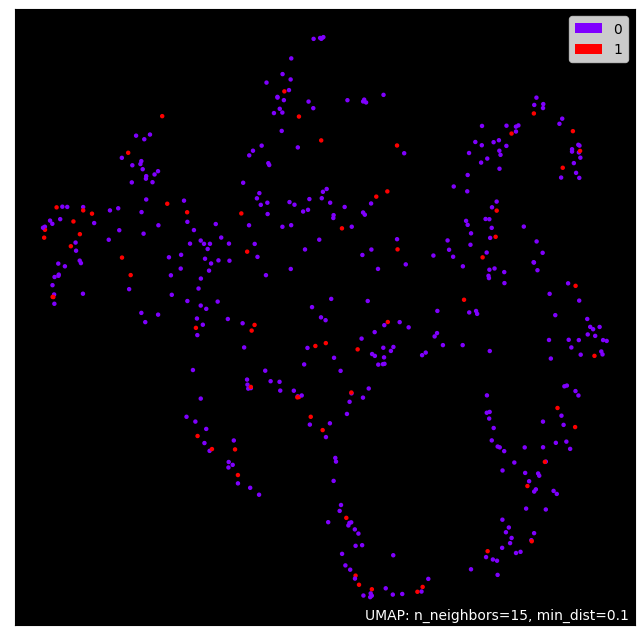

In [154]:
# pip install umap-learn[plot]
import umap
import umap.plot

mapper = umap.UMAP().fit(X) 
umap.plot.points(mapper, labels=y, theme='fire')

In [155]:
# split data
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [156]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(352, 57)
(88, 57)
(352,)
(88,)


In [157]:
# Check split distribution
y_train.value_counts(normalize=True)

0    0.855114
1    0.144886
Name: compliance_2021, dtype: float64

In [158]:
y_val.value_counts(normalize=True)

0    0.829545
1    0.170455
Name: compliance_2021, dtype: float64

In [159]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [160]:
# Logistic regression
lr = LogisticRegression(random_state=11)
lr.fit(X_train,y_train)
lr.score(X_val,y_val)

C:\Users\dimon\OneDrive - Tartu Ülikool\Dokumendid\ML\ML2022-Drinking-Water-Quality\aqua_learning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8295454545454546

In [161]:
print(confusion_matrix(y_val,lr.predict(X_val)))

[[71  2]
 [13  2]]


In [162]:
submission_lr = pd.DataFrame({"station_id":df_test["station_id"], "compliance_2021": lr.predict(df_test)})
submission_lr

,station_id,compliance_2021
0,163,0
1,167,0
2,171,0
3,174,0
4,178,0
...,...,...
184,1941,1
185,2087,0
186,2206,0
187,2303,0


In [163]:
submission_lr.to_csv('lr_submission.csv',index=False)

In [164]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train,y_train)
dt.score(X_val,y_val)

0.7159090909090909

In [165]:
print(confusion_matrix(y_val,dt.predict(X_val)))

[[58 15]
 [10  5]]


In [166]:
submission_dt = pd.DataFrame({"station_id":df_test["station_id"], "compliance_2021": dt.predict(df_test)})
submission_dt

,station_id,compliance_2021
0,163,0
1,167,1
2,171,1
3,174,0
4,178,0
...,...,...
184,1941,1
185,2087,1
186,2206,1
187,2303,0


In [167]:
submission_dt.to_csv('dt_submission.csv',index=False)

## Cool stuff

In [17]:
#pip install pycaret-ts-alpha

from pycaret.classification import *

In [18]:
clf1 = setup(data = df_train, 
             target = 'compliance_2021',
             preprocess = False,
             silent = True)

,Description,Value
0,session_id,7202
1,Target,compliance_2021
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(440, 58)"
5,Missing Values,False
6,Numeric Features,54
7,Categorical Features,3
8,Transformed Train Set,"(307, 57)"
9,Transformed Test Set,"(133, 57)"


In [19]:
top5 = compare_models(sort='Accuracy',
                      n_select = 5,
                      exclude=['dummy','svm','nb','qda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8503,0.7150,0.0200,0.0500,0.0286,0.0213,0.0242,2.3700
rf,Random Forest Classifier,0.8406,0.7243,0.0000,0.0000,0.0000,-0.0158,-0.0195,0.0890
knn,K Neighbors Classifier,0.8374,0.5762,0.0000,0.0000,0.0000,-0.0225,-0.0310,0.0220
et,Extra Trees Classifier,0.8372,0.7354,0.1100,0.3500,0.1638,0.1034,0.1246,0.0890
gbc,Gradient Boosting Classifier,0.8243,0.6510,0.1050,0.1750,0.1294,0.0625,0.0614,0.0540
lda,Linear Discriminant Analysis,0.8114,0.6333,0.2200,0.3060,0.2488,0.1507,0.1538,0.0100
ridge,Ridge Classifier,0.8112,0.0000,0.0850,0.2750,0.1202,0.0406,0.0588,0.0060
lr,Logistic Regression,0.8081,0.5932,0.1050,0.2167,0.1313,0.0434,0.0522,1.3820
ada,Ada Boost Classifier,0.7885,0.5446,0.1550,0.2183,0.1736,0.0609,0.0639,0.0520
dt,Decision Tree Classifier,0.7884,0.5954,0.3250,0.2888,0.2924,0.1772,0.1850,0.0080


In [20]:
catboost = create_model('catboost')
knn = create_model('knn')
rf = create_model('rf')
et = create_model('et')
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.5370,0.0000,0.0000,0.0000,-0.0544,-0.0703
1,0.8387,0.8692,0.2000,0.5000,0.2857,0.2132,0.2418
2,0.8065,0.5000,0.0000,0.0000,0.0000,-0.0568,-0.0801
3,0.7742,0.6692,0.2000,0.2500,0.2222,0.0921,0.0928
4,0.8065,0.4692,0.2000,0.3333,0.2500,0.1468,0.1531
5,0.8387,0.7923,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8065,0.7308,0.2000,0.3333,0.2500,0.1468,0.1531
7,0.8333,0.7596,0.0000,0.0000,0.0000,-0.0563,-0.0728
8,0.8333,0.6058,0.2500,0.3333,0.2857,0.1935,0.1961


In [21]:
# Hyperparameters tuning
tuned_catboost = tune_model(catboost, optimize = 'Accuracy')
tuned_knn = tune_model(knn, optimize = 'Accuracy')
tuned_rf = tune_model(rf, optimize = 'Accuracy')
tuned_et = tune_model(et, optimize = 'Accuracy')
tuned_gbc = tune_model(gbc, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.7870,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8387,0.9615,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8387,0.7308,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8065,0.6769,0.2000,0.3333,0.2500,0.1468,0.1531
4,0.8710,0.5731,0.4000,0.6667,0.5000,0.4312,0.4498
5,0.8710,0.8231,0.2000,1.0000,0.3333,0.2955,0.4163
6,0.8710,0.7538,0.2000,1.0000,0.3333,0.2955,0.4163
7,0.8667,0.4423,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8667,0.6635,0.2500,0.5000,0.3333,0.2683,0.2883


In [35]:
stack_model = stack_models(estimator_list = top5, meta_model = top5[0],optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.5833,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8710,0.9167,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8710,0.6204,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8710,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8710,0.5093,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8387,0.7769,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8387,0.5385,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8667,0.5577,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8667,0.7596,0.0000,0.0000,0.0000,0.0000,0.0000


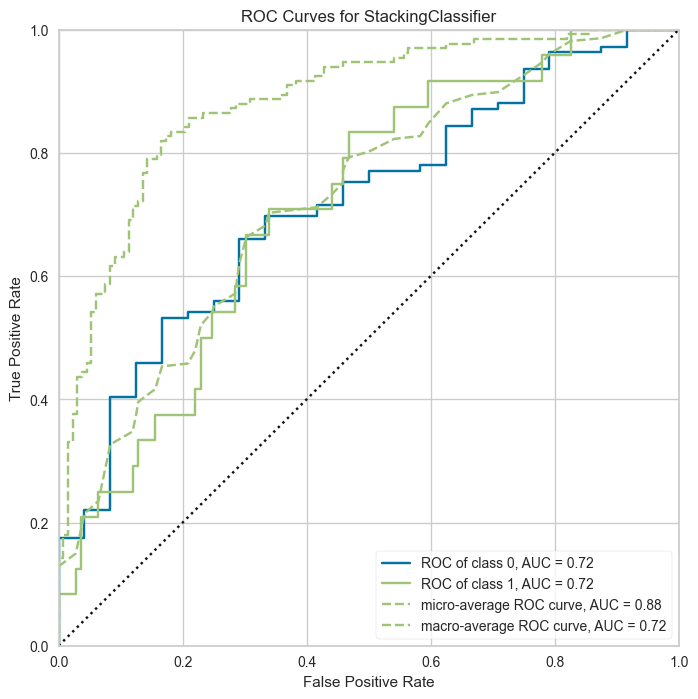

In [40]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot = 'auc')

In [22]:
# get link to source code
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#prediction
pred = stack_model.predict(X_val)
pred_proba = stack_model.predict_proba(X_val)[:,1]
#Accuracy
confusion_stack = get_clf_eval(y_val, pred, pred_proba)

accuracy: 0.9318, precision: 1.0000, recall: 0.4545,    F1: 0.6250, AUC:0.9752


Text(0.5, 1.0, 'Confusion Matrix (Stacking)')

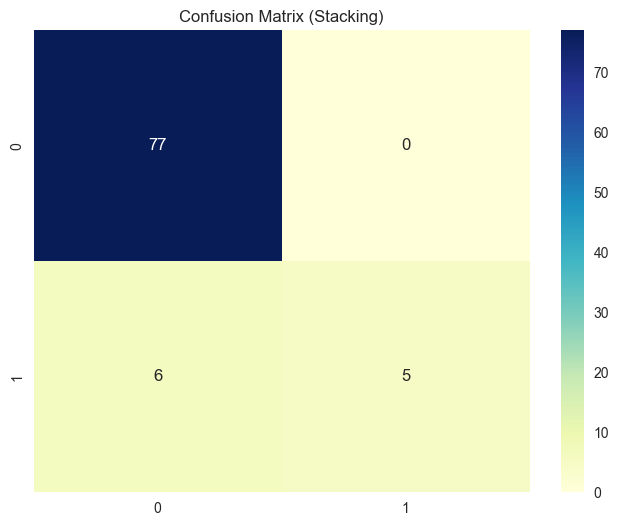

In [51]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_stack, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Stacking)')

In [52]:
cali_model = calibrate_model(stack_model)
final_model = finalize_model(cali_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.5833,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8710,0.9352,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8710,0.6111,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8710,0.7315,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8710,0.5185,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8387,0.7923,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8387,0.6000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8667,0.5577,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8667,0.7500,0.0000,0.0000,0.0000,0.0000,0.0000


In [54]:
submission_stack = pd.DataFrame({"station_id":df_test["station_id"], "compliance_2021": stack_model.predict(df_test)})
submission_stack

,station_id,compliance_2021
0,163,0
1,167,0
2,171,0
3,174,0
4,178,0
...,...,...
184,1941,0
185,2087,0
186,2206,0
187,2303,0


In [55]:
submission_stack.to_csv('stack_submission.csv',index=False)

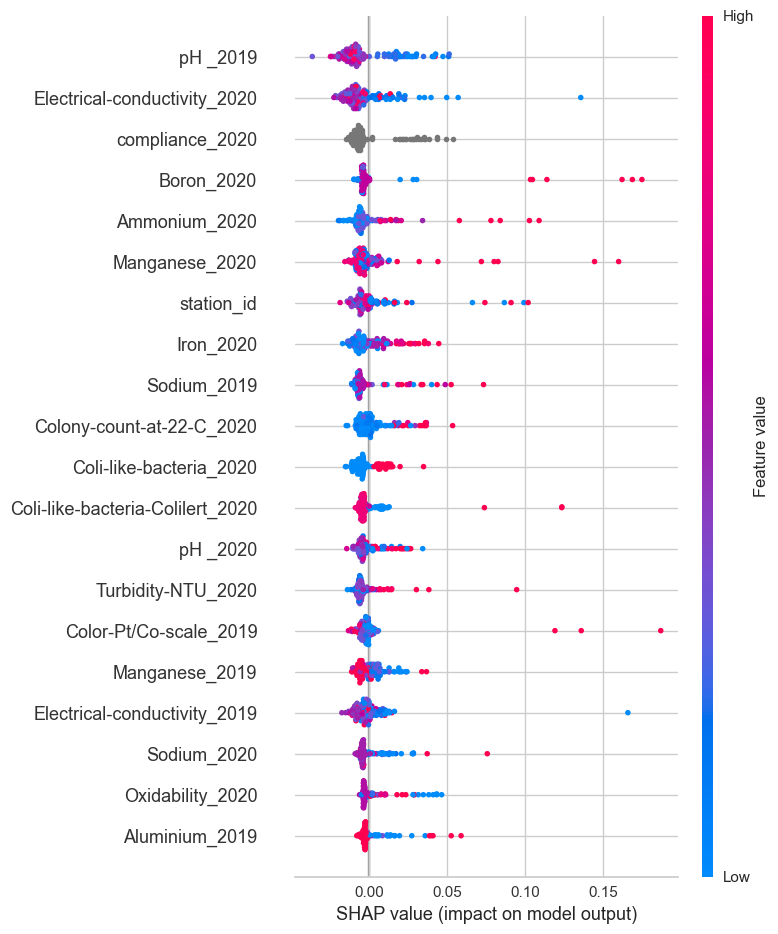

In [56]:
interpret_model(rf)

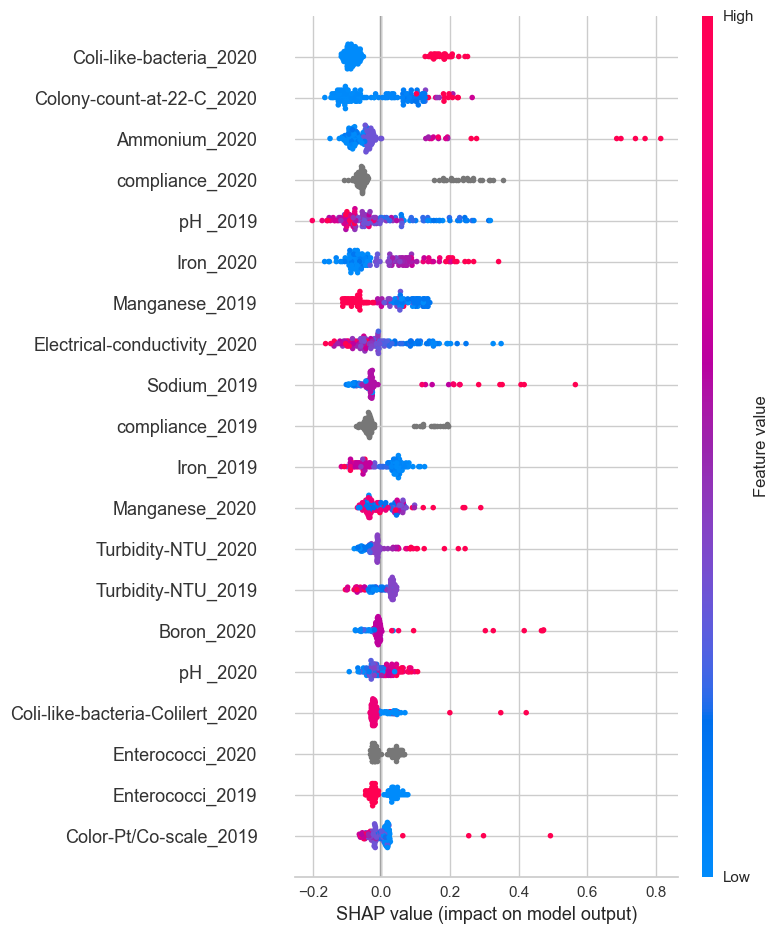

In [57]:
interpret_model(catboost)

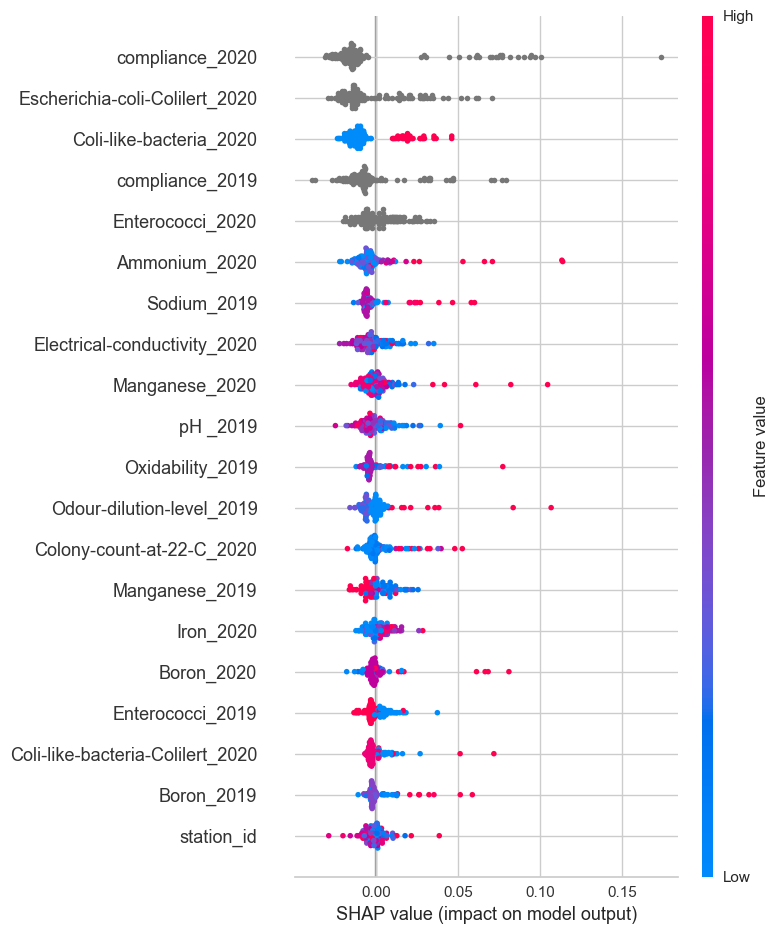

In [59]:
interpret_model(et)

Soft voting (blending)

In [23]:
blend_soft_model = blend_models(estimator_list = top5, optimize = 'Accuracy',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.6852,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8387,0.9077,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8065,0.7231,0.0000,0.0000,0.0000,-0.0568,-0.0801
3,0.8387,0.6769,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8065,0.6154,0.0000,0.0000,0.0000,-0.0568,-0.0801
5,0.8387,0.9000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8065,0.6385,0.0000,0.0000,0.0000,-0.0568,-0.0801
7,0.8333,0.7500,0.0000,0.0000,0.0000,-0.0563,-0.0728
8,0.8667,0.7788,0.0000,0.0000,0.0000,0.0000,0.0000


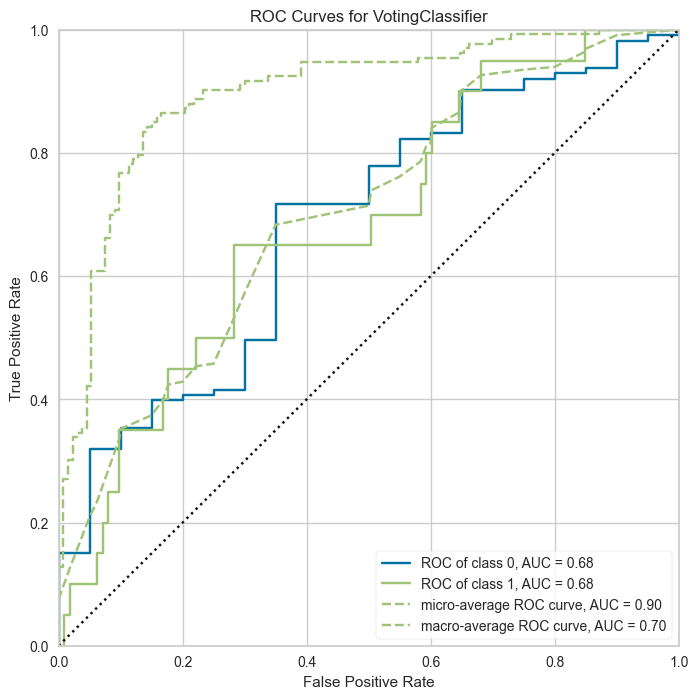

In [24]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft_model, plot = 'auc')

In [25]:
#prediction
pred = blend_soft_model.predict(X_val)
pred_proba = blend_soft_model.predict_proba(X_val)[:,1]
#Accuracy
confusion_soft_vote = get_clf_eval(y_val, pred, pred_proba)

accuracy: 0.9545, precision: 0.8889, recall: 0.7273,    F1: 0.8000, AUC:0.9516


Text(0.5, 1.0, 'Confusion Matrix (Soft voting)')

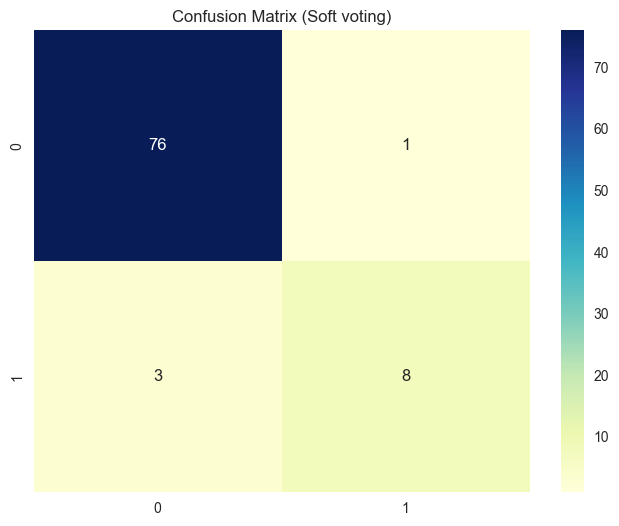

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_soft_vote, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Soft voting)')

In [27]:
cali_model = calibrate_model(blend_soft_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.7222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8387,0.9385,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8065,0.7231,0.0000,0.0000,0.0000,-0.0568,-0.0801
3,0.8387,0.6154,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8387,0.6154,0.2000,0.5000,0.2857,0.2132,0.2418
5,0.8387,0.9077,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8387,0.7000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8667,0.7692,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8667,0.7308,0.0000,0.0000,0.0000,0.0000,0.0000


In [28]:
final_model = finalize_model(cali_model)

In [29]:
submission_blend_soft = pd.DataFrame({"station_id":df_test["station_id"], "compliance_2021": blend_soft_model.predict(df_test)})
submission_blend_soft

,station_id,compliance_2021
0,163,0
1,167,0
2,171,0
3,174,0
4,178,0
...,...,...
184,1941,1
185,2087,0
186,2206,0
187,2303,0


In [30]:
submission_blend_soft.to_csv('soft_voting_submission.csv',index=False)

Hard voting

In [31]:
blend_hard_model = blend_models(estimator_list = top5, optimize = 'Accuracy',method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8387,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8065,0.0000,0.0000,0.0000,0.0000,-0.0568,-0.0801
3,0.8065,0.0000,0.0000,0.0000,0.0000,-0.0568,-0.0801
4,0.8387,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8387,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8065,0.0000,0.0000,0.0000,0.0000,-0.0568,-0.0801
7,0.8667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [35]:
#prediction
pred = blend_hard_model.predict(X_val)

#Accuracy
confusion_hard_vote = confusion_matrix(y_val, pred)
accuracy = accuracy_score(y_val, pred)
precision = precision_score(y_val, pred)
recall = recall_score(y_val, pred)
f1 = f1_score(y_val, pred) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.9432, precision: 0.8750, recall: 0.6364,F1: 0.7368


Text(0.5, 1.0, 'Confusion Matrix (Hard voting)')

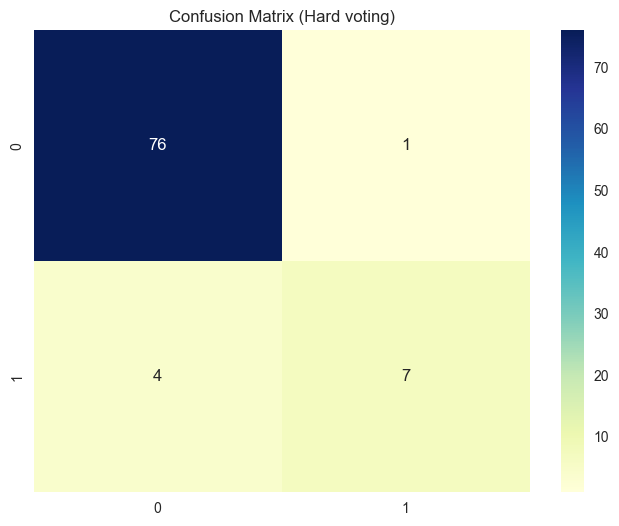

In [36]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_hard_vote, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Hard voting)')

In [38]:
#cali_model = calibrate_model(blend_hard_model)

In [39]:
final_model = finalize_model(blend_hard_model)

In [40]:
submission_blend_hard = pd.DataFrame({"station_id":df_test["station_id"], "compliance_2021": blend_hard_model.predict(df_test)})
submission_blend_hard

,station_id,compliance_2021
0,163,0
1,167,0
2,171,0
3,174,0
4,178,0
...,...,...
184,1941,1
185,2087,0
186,2206,0
187,2303,0


In [41]:
submission_blend_hard.to_csv('hard_voting_submission.csv',index=False)